In [1]:
#기본
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import FinanceDataReader as fdr
import mglearn
import sklearn

#분류 모델
from sklearn.svm import LinearSVC
from sklearn import neighbors,svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
#스케일러
from sklearn.preprocessing import MinMaxScaler

#성과 평가
from sklearn.metrics import confusion_matrix #오차행렬
from sklearn.metrics import accuracy_score #정확도
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


C:\Program Files\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Program Files\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
#특성 추가 ------------------------------------------
    #이동평균선
def get_MA(df):
    MA_10=df["Close"].rolling(10).mean()
    MA_60=df["Close"].rolling(60).mean
    df=df.assign(MA_10=MA_10,MA_60=MA_60).dropna()
    
    return df

    
    #스토캐스틱
def get_stochastic(df, n=15, m=5, t=3):
    # n일중 최고가
    ndays_high = df.High.rolling(window=n, min_periods=1).max()
    # n일중 최저가
    ndays_low = df.Low.rolling(window=n, min_periods=1).min()
 
    # Fast%K 계산
    kdj_k = ((df.Close - ndays_low) / (ndays_high - ndays_low))*100
    # Fast%D (=Slow%K) 계산
    kdj_d = kdj_k.ewm(span=m).mean()
    # Slow%D 계산
    kdj_j = kdj_d.ewm(span=t).mean()
 
    # dataframe에 컬럼 추가
    df = df.assign(kdj_k=kdj_k, kdj_d=kdj_d, kdj_j=kdj_j).dropna()
    
    return df
   
    #시간
def get_time(df):
    time=np.linspace(0,10,len(df),endpoint=False).reshape(-1,1)
    df=df.assign(time=time)
    
    return df

In [3]:
# Methods

#train_test_split, score 도출----------------------

def print_score(X,y,model):
    
    setlen=int(round(len(X)*0.7,0))
    y=y.astype('int')
    X_train,X_test,y_train,y_test=X[:setlen],X[setlen:],y[:setlen],y[setlen:]

    reg=model.fit(X_train,y_train)
    print("훈련 세트 정확도:{:.3f}".format(reg.score(X_train,y_train)))
    print("테스트 세트 정확도:{:.3f}".format(reg.score(X_test,y_test)))

    confusion=confusion_matrix(y_test,reg.predict(X_test))
    print(confusion)
    
    


#미래 예측을 위한 시간조정-------------------   

def adjust_time(X,y):
    y=pd.DataFrame(np.array(y),index=X.index).shift(-1).dropna()
    X=X.loc[y.index].dropna()
    
    return X,y


In [4]:

RandomForestClassifier()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:


plt.plot(KS_MA.index,KS_MA["Close"])
plt.plot(KS_MA.index,KS_MA["MA_60"])
plt.plot(KS_MA.index,KS_MA["MA_360"])
print("HSI")

In [ ]:
plt.plot(KS_MA.index,KS_MA["MA_60"])
print("MA_60")

In [ ]:
plt.plot(KS_MA.index,KS_MA["MA_360"])
print("MA_360")

In [9]:
def cross_score(X,y,SC):
    print("\n교차검증 테스트------")
    len1=int(round(len(X)*1/5,0))
    len2=int(round(len1*4/5,0))
    X_cross,y_cross=X[:len1],y[:len1]
    X_train,y_train,X_test,y_test=X_cross[:len2],y_cross[:len2],X_cross[len2:],y_cross[len2:]
    train_score1=RandomForestClassifier(random_state=2).fit(X_train,y_train).score(X_train,y_train)
    test_score1=RandomForestClassifier(random_state=2).fit(X_train,y_train).score(X_test,y_test)

    len1=int(round(len(X)*2/5,0))
    len2=int(round(len1*9/10,0))
    X_cross,y_cross=X[:len1],y[:len1]
    X_train,y_train,X_test,y_test=X_cross[:len2],y_cross[:len2],X_cross[len2:],y_cross[len2:]
    train_score2=RandomForestClassifier(random_state=2).fit(X_train,y_train).score(X_train,y_train)
    test_score2=RandomForestClassifier(random_state=2).fit(X_train,y_train).score(X_test,y_test)

    len1=int(round(len(X)*3/5,0))
    len2=int(round(len1*14/15,0))
    X_cross,y_cross=X[:len1],y[:len1]
    X_train,y_train,X_test,y_test=X_cross[:len2],y_cross[:len2],X_cross[len2:],y_cross[len2:]
    train_score3=RandomForestClassifier(random_state=2).fit(X_train,y_train).score(X_train,y_train)
    test_score3=RandomForestClassifier(random_state=2).fit(X_train,y_train).score(X_test,y_test)

    len1=int(round(len(X)*4/5,0))
    len2=int(round(len1*19/20,0))
    X_cross,y_cross=X[:len1],y[:len1]
    X_train,y_train,X_test,y_test=X_cross[:len2],y_cross[:len2],X_cross[len2:],y_cross[len2:]
    train_score4=RandomForestClassifier(random_state=2).fit(X_train,y_train).score(X_train,y_train)
    test_score4=RandomForestClassifier(random_state=2).fit(X_train,y_train).score(X_test,y_test)

    len1=int(round(len(X)*5/5,0))
    len2=int(round(len1*24/25,0))
    X_cross,y_cross=X[:len1],y[:len1]
    X_train,y_train,X_test,y_test=X_cross[:len2],y_cross[:len2],X_cross[len2:],y_cross[len2:]
    train_score5=RandomForestClassifier(random_state=2).fit(X_train,y_train).score(X_train,y_train)
    test_score5=RandomForestClassifier(random_state=2).fit(X_train,y_train).score(X_test,y_test)

    X_train_score=(train_score1+train_score2+train_score3+train_score4+train_score5)/5
    X_test_score=(test_score1+test_score2+test_score3+test_score4+test_score5)/5
    print("교차검증 훈련 점수 : ",X_train_score,"\n교차검증 테스트 점수 : ",X_test_score)
    SC.append("훈련 교차 :%s, 테스트 교차 : %s" %(X_train_score,X_test_score))


In [16]:
KS

,Close,Open,High,Low,Volume,Change,kdj_k,kdj_d,kdj_j,time,MA_3
Date,,,,,,,,,,,
2008-12-12,0.9980,1.0000,1.0300,0.9600,1290000.0,-0.0495,36.363636,48.006380,53.016632,0.007372,1.038000
2008-12-15,0.9310,0.9800,1.0370,0.9000,2890000.0,-0.0671,11.654135,32.906217,42.291077,0.011058,0.993000
2008-12-16,0.9000,0.9100,0.9480,0.8800,4180000.0,-0.0333,6.993007,22.958492,32.312969,0.014744,0.943000
2008-12-17,0.9020,0.8500,0.9100,0.8400,11520000.0,0.0022,19.018405,21.518731,26.830181,0.018430,0.911000
2008-12-18,0.8400,0.9120,0.9270,0.8200,13070000.0,-0.0687,5.780347,15.946471,21.345477,0.022116,0.880667
...,...,...,...,...,...,...,...,...,...,...,...
2019-09-25,1.1900,1.1915,1.1915,1.1631,223940000.0,-0.0015,19.793966,40.823403,50.661823,9.981570,1.203967
2019-09-26,1.2258,1.1900,1.2421,1.1834,296820000.0,0.0301,46.136865,42.594557,46.628190,9.985256,1.202533
2019-09-27,1.2101,1.2330,1.2399,1.2057,308920000.0,-0.0128,34.584253,39.924456,43.276323,9.988942,1.208633


In [11]:

import warnings
warnings.filterwarnings(action='ignore') 



SC=[]
for y in ["US500","RSTI","EURO","HSI"]:
    SC.append(y)
    print("\n",y,"-------------")
    
    KS=fdr.DataReader(y,"1990-01-01","2019-10-01")
    KS=get_stochastic(KS)
    KS=get_time(KS)
    
    
    MA_3=KS["Close"].rolling(3).mean().dropna()
    MA_5=KS["Close"].rolling(5).mean().dropna()
    MA_10=KS["Close"].rolling(10).mean().dropna()
    MA_20=KS["Close"].rolling(20).mean().dropna()
    MA_30=KS["Close"].rolling(30).mean().dropna()
    malist=[MA_3,MA_5,MA_10,MA_20,MA_30]
    malist2=["MA_3","MA_5","MA_10","MA_20","MA_30",]
    n=0
    score_list=[]
        
    for x in malist:
        KS[malist2[n]]=x
        KS=KS.dropna()
        
        y=np.where(KS["Close"]>KS[malist2[n]],1,0)
        X,y=adjust_time(KS,y)

        setlen=int(round(len(X)*0.7,0))
        y=y.astype('int')
        X_train,X_test,y_train,y_test=X[:setlen],X[setlen:],y[:setlen],y[setlen:]
        print(malist2[n])
        
        print_score(X,y,SGDClassifier(random_state=2))
        SC.append(malist2[n])
        cross_score(X,y,SC)
        n=n+1


 US500 -------------
MA_3
훈련 세트 정확도:0.455
테스트 세트 정확도:0.434
[[447   0]
 [587   3]]

교차검증 테스트------
교차검증 훈련 점수 :  0.9806166382819235 
교차검증 테스트 점수 :  0.5217391304347826
MA_5
훈련 세트 정확도:0.600
테스트 세트 정확도:0.593
[[  5 422]
 [  0 609]]

교차검증 테스트------
교차검증 훈련 점수 :  0.9844181886912967 
교차검증 테스트 점수 :  0.6695652173913044
MA_10
훈련 세트 정확도:0.679
테스트 세트 정확도:0.431
[[369   2]
 [586  77]]

교차검증 테스트------
교차검증 훈련 점수 :  0.9802096810137918 
교차검증 테스트 점수 :  0.7130434782608696
MA_20
훈련 세트 정확도:0.653
테스트 세트 정확도:0.362
[[334   0]
 [658  39]]

교차검증 테스트------
교차검증 훈련 점수 :  0.9899691905749247 
교차검증 테스트 점수 :  0.7751613244472655
MA_30
훈련 세트 정확도:0.761
테스트 세트 정확도:0.756
[[ 88 251]
 [  0 689]]

교차검증 테스트------
교차검증 훈련 점수 :  0.9919466836106265 
교차검증 테스트 점수 :  0.751824817518248

 RSTI -------------
MA_3
훈련 세트 정확도:0.514
테스트 세트 정확도:0.497
[[404   0]
 [409   0]]

교차검증 테스트------


KeyboardInterrupt: 

In [ ]:
from sklearn.datasets import make_moons
X,y= make_moons(n_samples=100,noise=0.25,random_state=3)
plt.plot(X,X,'.')

In [ ]:
SC

In [15]:
X_test

,Close,Open,High,Low,Volume,Change,kdj_k,kdj_d,kdj_j,time,MA_3
Date,,,,,,,,,,,
2016-07-18,0.7081,0.6900,0.7148,0.6881,185080000.0,0.0224,86.447474,82.643228,82.374468,6.999631,0.698567
2016-07-19,0.7000,0.7064,0.7120,0.6908,140710000.0,-0.0114,79.321754,81.536070,81.955269,7.003317,0.700233
2016-07-20,0.6932,0.7005,0.7066,0.6921,104320000.0,-0.0097,72.538860,78.537000,80.246134,7.007003,0.700433
2016-07-21,0.7020,0.6950,0.7044,0.6931,66900000.0,0.0127,79.912664,78.995554,79.620844,7.010689,0.698400
2016-07-22,0.7426,0.7002,0.7439,0.7002,451370000.0,0.0578,99.012158,85.667756,82.644300,7.014375,0.712600
...,...,...,...,...,...,...,...,...,...,...,...
2019-09-24,1.1918,1.2294,1.2400,1.1870,136190000.0,-0.0311,25.503822,51.338121,60.500243,9.977884,1.220667
2019-09-25,1.1900,1.1915,1.1915,1.1631,223940000.0,-0.0015,19.793966,40.823403,50.661823,9.981570,1.203967
2019-09-26,1.2258,1.1900,1.2421,1.1834,296820000.0,0.0301,46.136865,42.594557,46.628190,9.985256,1.202533


In [6]:

reg1=neighbors.KNeighborsClassifier(n_neighbors=2).fit(X_train,y_train)
reg2=svm.SVC(C=1000,gamma=0.01).fit(X_train,y_train)
reg3=RandomForestClassifier(n_estimators=50).fit(X_train,y_train)
reg4=GradientBoostingClassifier(random_state=0).fit(X_train,y_train)

precision,recall,thresholds=precision_recall_curve(y_test,reg4.decision_function(X_test))

NameError: name 'X_train' is not defined

In [7]:

reg1=neighbors.KNeighborsClassifier(n_neighbors=2).fit(X_train,y_train)
reg2=svm.SVC(C=1000,gamma=0.01).fit(X_train,y_train)
reg3=RandomForestClassifier(n_estimators=50).fit(X_train,y_train)
reg4=GradientBoostingClassifier(random_state=0).fit(X_train,y_train)

precision,recall,thresholds=precision_recall_curve(y_test,reg4.decision_function(X_test))

close_zero=np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero],recall[close_zero],'o',markersize=10,label='0',fillstyle="none",c='k',mew=2)
plt.plot(precision,recall,label="curve")
plt.xlabel("precision")
plt.ylabel('recall')
plt.legend(loc="best")


NameError: name 'X_train' is not defined

In [8]:
from sklearn.metrics import roc_curve

plt.figure(figsize=(4, 4))
fpr_rf,tpr_rf,thresholds_rf=roc_curve(y_test,reg3.predict_proba(X_test)[:,1])

plt.plot(fpr_rf,tpr_rf,'k')
plt.xlabel("FPR")
plt.ylabel("TPR(recall)")
plt.plot(fpr_rf[close_default_rf],tpr_rf[close_default_rf],'^',markersize=10,label="RF recall : 0.5",fillstyle="none",mew=2)


NameError: name 'y_test' is not defined

<Figure size 288x288 with 0 Axes>

In [ ]:
X

In [ ]:
plt.plot(X.index,X["Close"])
plt.plot(X.index,X["MA_60"],'k')

In [ ]:
y

In [ ]:
plt.plot(X.index,X["Close"])

In [ ]:
plt.plot(X.index[:int(round(len(X.index)*0.8,0))],X["Close"][:int(round(len(X.index)*0.8,0))])
plt.plot(X.index[int(round(len(X.index)*0.8,0)):],X["Close"][int(round(len(X.index)*0.8,0)):])

plt.title("IXIC")

In [ ]:
X

In [ ]:
len(X)-setlen

In [ ]:
len(X_test)

In [ ]:
setlen=int(round(len(X)*0.7,0))

In [ ]:
len(X)-setlen

In [ ]:
time=np.linspace(0,10,len(df),endpoint=False).reshape(-1,1)
    df=df.assign(time=time)

In [ ]:

# 양수와 음수로 조정한 2중 분류 ---------------


y=np.where(KS["Close"]>KS["MA_60"],1,0)

X,y=adjust_time(KS,y)

setlen=int(round(len(X)*0.8,0))
y=y.astype('int')
X_train,X_test,y_train,y_test=X[:setlen],X[setlen:],y[:setlen],y[setlen:]

print_score(X,y,RandomForestClassifier())


In [ ]:
lenset=np.linspace(0,100,5)
for x in lenset:
    len=int(len(X)*x)
    X_train,X_test,y_train,y_test=

In [ ]:
np.linspace(50,100,2)

In [ ]:
for i in np.linspace(50,100,2):
    df.loc[      KS [KS['Change'] >= initial]           [KS['Change'] <= round(np.percentile(KS['Change'], i),4)].index      ] = num
    initial = round(np.percentile(KS['Change'], i),4)
    num += 1

In [ ]:
np.percentile([0,1,2,3,4],)


In [106]:
y=[60,90,120,180,360]
HIS=[0.7413,0.6994,0.6483,0.7452,0.65]
RSTI=[0.715,0.731,0.8297,0.7115,0.8702]
EURO=[0.7925,0.7509,0.7843,0.7346,0.8714]
SP=[0.8338,0.8859,0.8730,0.9572,0.8967]

In [107]:
U=[0.7779411764705882,
0.68,
0.6692739310963978,
0.7709923664122138,
0.8435483870967742]

R=[0.660377358490566,
0.6266666666666667,
0.6788461538461539,
0.7683168316831683,
0.827659574468085]

E=[0.7444444444444445,
0.7660377358490567,
0.7411764705882352,
0.5428571428571429,
0.9428571428571428]

H=[0.6293478260869565,
0.6404371584699453,
0.543956043956044,
0.7027932960893855,
0.7662790697674418]

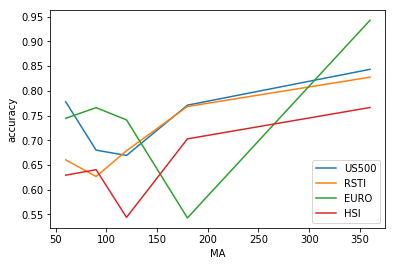

In [108]:
plt.ylabel("accuracy")
plt.xlabel("MA")
plt.plot(y,U,label='US500')
plt.plot(y,R,label="RSTI")
plt.plot(y,E,label="EURO")
plt.plot(y,H,label="HSI")
plt.legend(loc=4)
plt.show()

In [ ]:
US500',
 'MA_60',
 '0.9946178808039561랑0.7779411764705882',
 'MA_90',
 '0.9954979693375515랑0.68',
 'MA_120',
 '0.9951081073342584랑0.6692739310963978',
 'MA_180',
 '0.9985671221637429랑0.7709923664122138',
 'MA_360',
 '0.9985205364519854랑0.8435483870967742',
 'RSTI',
 'MA_60',
 '0.9954822381817754랑0.660377358490566',
 'MA_90',
 '0.9965671430914064랑0.6266666666666667',
 'MA_120',
 '0.9979407023559823랑0.6788461538461539',
 'MA_180',
 '0.9972150610085759랑0.7683168316831683',
 'MA_360',
 '0.9983677397877042랑0.827659574468085',
 'EURO',
 'MA_60',
 '0.989258496068303랑0.7444444444444445',
 'MA_90',
 '0.9932027183301922랑0.7660377358490567',
 'MA_120',
 '0.9941954912887276랑0.7411764705882352',
 'MA_180',
 '0.9980217978301775랑0.5428571428571429',
 'MA_360',
 '0.9950377127333099랑0.9428571428571428',
 'HSI',
 'MA_60',
 '0.9961781187386279랑0.6293478260869565',
 'MA_90',
 '0.9968203751637746랑0.6404371584699453',
 'MA_120',
 '0.996045692447743랑0.543956043956044',
 'MA_180',
 '0.9981130899959823랑0.7027932960893855',
 'MA_360',
 '0.9993397619218852랑0.7662790697674418']